<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
movies.count(axis = 0)
# Number of rows

star_rating       979
title             979
content_rating    976
genre             979
duration          979
actors_list       979
dtype: int64

In [4]:
movies.count(axis = 1)
# Number of columns

0      6
1      6
2      6
3      6
4      6
      ..
974    6
975    6
976    6
977    6
978    6
Length: 979, dtype: int64

In [8]:
movies.info()
# This method shows these two pieces of information together :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Check the data type of each column.

In [17]:
movies.dtypes
# Checking the data type of each column

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [9]:
movies['duration'].mean()
# Average duration of all movies

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [10]:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

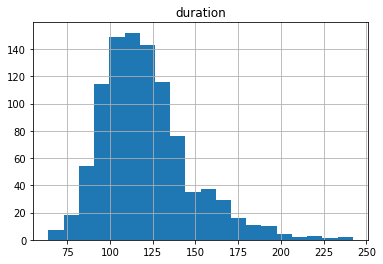

In [44]:
movies.hist('duration', bins = 20);
# I chose 20 because I wanted the data to look like as normal of a distribution as possible

In [21]:
pd.qcut(movies['duration'], q=4)
# Also did some experimentation with qcut to understand how to split the data equally into four groups

0      (134.0, 242.0]
1      (134.0, 242.0]
2      (134.0, 242.0]
3      (134.0, 242.0]
4      (134.0, 242.0]
            ...      
974    (102.0, 117.0]
975    (117.0, 134.0]
976    (134.0, 242.0]
977    (102.0, 117.0]
978    (117.0, 134.0]
Name: duration, Length: 979, dtype: category
Categories (4, interval[float64]): [(63.999, 102.0] < (102.0, 117.0] < (117.0, 134.0] < (134.0, 242.0]]

#### Use a box plot to display that same data.

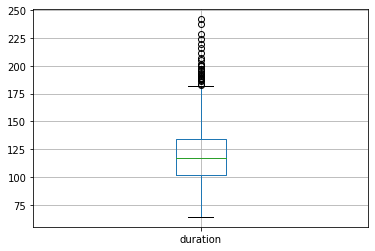

In [47]:
movies.boxplot('duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [66]:
movies.groupby('content_rating')['title'].count()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

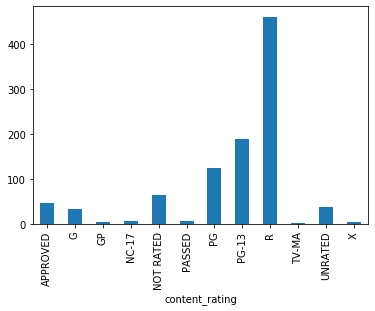

In [86]:
vis = movies.groupby('content_rating')['title'].count()
vis.plot.bar(x = 'rating', y = 'count');
# Can't figure out why my labels are not working

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [94]:
movies = movies.replace(['NOT RATED', 'APPROVED','PASSED', 'GP'], 'UNRATED')
movies.groupby('content_rating')['title'].count()
# Re-ran the groupby to double check that it worked 

content_rating
G           32
NC-17        7
PG         123
PG-13      189
R          460
TV-MA        1
UNRATED    160
X            4
Name: title, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [97]:
movies = movies.replace(['X', 'TV-MA'], 'NC-17')
movies.groupby('content_rating')['title'].count()

content_rating
G           32
NC-17       12
PG         123
PG-13      189
R          460
UNRATED    160
Name: title, dtype: int64

#### Count the number of missing values in each column.

In [99]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [105]:
movies[movies.isna().any(axis=1)]
# Butch Cassidy is rated PG
# Where Eagles Dare is also PG
# True Grit is rated PG-13


,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [109]:
movies = movies.fillna('PG')
movies.isnull().sum()
# I replaced them all with PG... Could refine this to replace only one of them
# Just checking to make sure it worked

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [133]:
two_or_more = movies[movies.duration >= 120]['star_rating'].mean()
# Average star rating for movies two hours or longer

less_than_two = movies[movies.duration < 120]['star_rating'].mean()
# Average star rating for movies under two hours

two_or_more > less_than_two
# The average star rating for movies two hours or longer is greater than movies under two hours

True

#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [137]:
movies.scatter(x='duration', y='star_rating', kind = 'scatter')

AttributeError: 'DataFrame' object has no attribute 'scatter'

In [73]:
movies.corr(method = 'pearson')

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


#### Calculate the average duration for each genre.

In [94]:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

#### Determine the top rated movie (by star rating) for each genre.

In [ ]:
# Answer:

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [ ]:
# Answer:

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [155]:
genrecounts = movies['genre'].value_counts()
genrecounts

relevantgenres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
relevantgenres

movies['star_rating']('relevantgenres').mean()

TypeError: 'Series' object is not callable

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [143]:
genrecounts = movies['genre'].value_counts()
relevantgenres = genrecounts >= 10

In [144]:
relevantgenres

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Sci-Fi       False
Thriller     False
Film-Noir    False
Family       False
Fantasy      False
History      False
Name: genre, dtype: bool

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!